# DSCI-100 Individual Planning Stage of Project

**Name:** Kyle Li
**Section:** 003
**Group:** 9
**Date:** Nov. 11, 2025




In [1]:
## Necessary Components to Preload

library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# (1) Data Description:

<u><b>What and Why:</u></b> The data we are provided in this project are the _players.csv_ and _sessions.csv_ datasets which originate from a Minecraft server run by a research group in Computer Science at UBC. The goal of this Minecraft server is to ultimately use player input data to train AI. However, I will only be analyzing the _players.csv_ as the predictive question I aim to answer doesn't require the _sessions.csv_ dataset. The specificity of this question will be expanded upon in the subsequent section. As such, in this section, we are firstly going to identify and define the characteristics of _players.csv_ and then summarize its statistics. It is important to note that the _players.csv_ data presented was gathered via self-reporting during server signup and compiled into a csv by the researchers. 


<u><b>Overview of Players Dataset:</u></b>
| Dataset | Number of Observations | Number of Variables | Represents |  
|:-----|:---:|:---:|:-----|
| players.csv | 196 | 7 | Data and list of all unique players involved with the server. |

<u><b>Player Dataset:</u></b>

**a) Variables**
| Variable | Type | Short Description |
|:-----|:-----|:-----|
| experience | Character | Self-reported level of experience with Minecraft. This ranged from Amateur -> Reguler -> Veteran -> Pro |
| subscribe | Logical (T/F) | Whether a player had suscribed to a game-related newsletter (yes = True, no = False) |
| hashedEmail | Character | Unique identifier of each player (anonymizing their emails via hashing) |
| played_hours | Numeric (dbl) | Hours spent on the Minecraft server for each participant |
| name | Character | First names (not gamertag) of each individual participating|
| gender | Character | Gender of each individual participating |
| Age | Numeric (dbl) | Age in years of each individual participating |

**b) Summary Statistics**
| Variable | Value (round to 2 decimals if possible) | 
|:-----|:-----:|
| Mean Age | 21.14 |
| Youngest Age | 9 |
| Oldest Age | 58 |
| Standard Deviation of Age | 7.39 | 
| Mean Hours Played | 5.85 |
| Highest Number of Hours Played | 223.1|
| Lowest Number of Hours Played | 0 |
| Standard Deviation of Hours Played | 28.36 | 
| Number of Players | 196 | 
| Proportion Subscribed (%) | 73.47 | 

Note: Since we know that each player (196 total) has a unique identifier and a first name, we also know that the number of hashed emails and names also equal to 196. Furthermore, for the sake of simplicity, I will not be presenting gender or experience proportions in the Summary Statistics table.

<u><b>Possible Concerns/Potential Issues:</u></b>
- Players may have overestimated or underestimated their abilities when stating their experience 
- Hours played may not be as exact since it seems to be rounded to 1 decimal in the dataset thus, those who log in for a few minutes may be reported as 0hrs
- Many players show 0 hours played which may indicate logging errors or lack of participation which may skew results
- People involved with this server may have submitted incorrect information e.g. gender, age, game-related newsletter subscription, etc.
- Factors outside of Minecraft may have influenced their ability to play on the server such as heavy workloads, access to a device that can properly run Minecraft, less of a workload which may lead to an abnormal increase of playtime, and etc.

# (2) Questions (Broad and Specific):

In regards to this project, the broad question I will attempt to address is question 2: "We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting effort." This is due to the fact that the research team recruitment and allocation of server resources heavily depend on the ability to identify players who will contribute a meaningful amount of data! Therefore, the specific question I wish to address is: whether or not age and experience can predict how many hours a player contributes? As a result, the _players.csv_ dataset will help me tremendously since it contains all necessary information regarding age, experience, and number of hours contributed on the Minecraft server! Since our response variable (played_hours) is numeric, we will likely use regression-based prediction methods which requires us to ensure that each variable is correctly converted (e.g. as a factor or numeric value), remove rows with missing values, remove rows with impossible values, and to select the specific variables previously stated in order to answer the questions. 

# (3) Exploratory Data Analysis and Visualization:

With my specific question in mind, I will perform the necessary steps of wrangling until the required data is tidy! This will be shown in the coding cell below:

In [2]:
# Coding cell demonstrating that the dataset can be loaded into R as well as the minimum necessary wrangling to tidy our data!

players_data <- read_csv("data/players.csv") # loading the dataset into R

summary(players_data) # looking at the overall data of the players.csv dataset

players_cleaned<-players_data|> # Ensuring that variables have the correct label type
    mutate(experience=factor(experience, 
        levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"),
        ordered=TRUE),
        Age = as.numeric(Age),
        played_hours = as.numeric(played_hours))

players_cleaned <- players_cleaned |> # Rows missing any of our three variables are removed
    filter(!is.na(Age), !is.na(experience), !is.na(played_hours))

players_cleaned <- players_cleaned |> # Removes nonsensical values
    filter(Age > 0, played_hours >= 0)

players_wrangled <- players_cleaned |> # Selecting for our specific variables
    select(played_hours, Age, experience)
players_wrangled

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

played_hours,Age,experience
<dbl>,<dbl>,<ord>
30.3,9,Pro
3.8,17,Veteran
0.0,17,Veteran
⋮,⋮,⋮
0.3,22,Veteran
0.0,57,Amateur
2.3,17,Amateur


In [3]:
# Second coding cell to compute the mean values for each quantitative variable in players.csv dataset! 
# The only numerical values for this dataset are "Age" and "played_hours" as viewed in the previous summary of the dataset!

players_summary <- players_data |> # Summarizing the means of "Age" and "played_hours" the two numerical values
    summarize( avg_age = mean(Age, na.rm = TRUE),
    avg_played_hours = mean(played_hours, na.rm = TRUE))

players_summary <- players_summary |> # Presents both mean numerical values in a table to 2 decimal places
    mutate(across(where(is.numeric), round, digits = 2))
players_summary

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(where(is.numeric), round, digits = 2)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


avg_age,avg_played_hours
<dbl>,<dbl>
21.14,5.85


If a proper table is required:
| Variable | Value  | 
|:-----|:-----|
| Mean Age | 21.14 |
| Mean Hours Played | 5.85 |

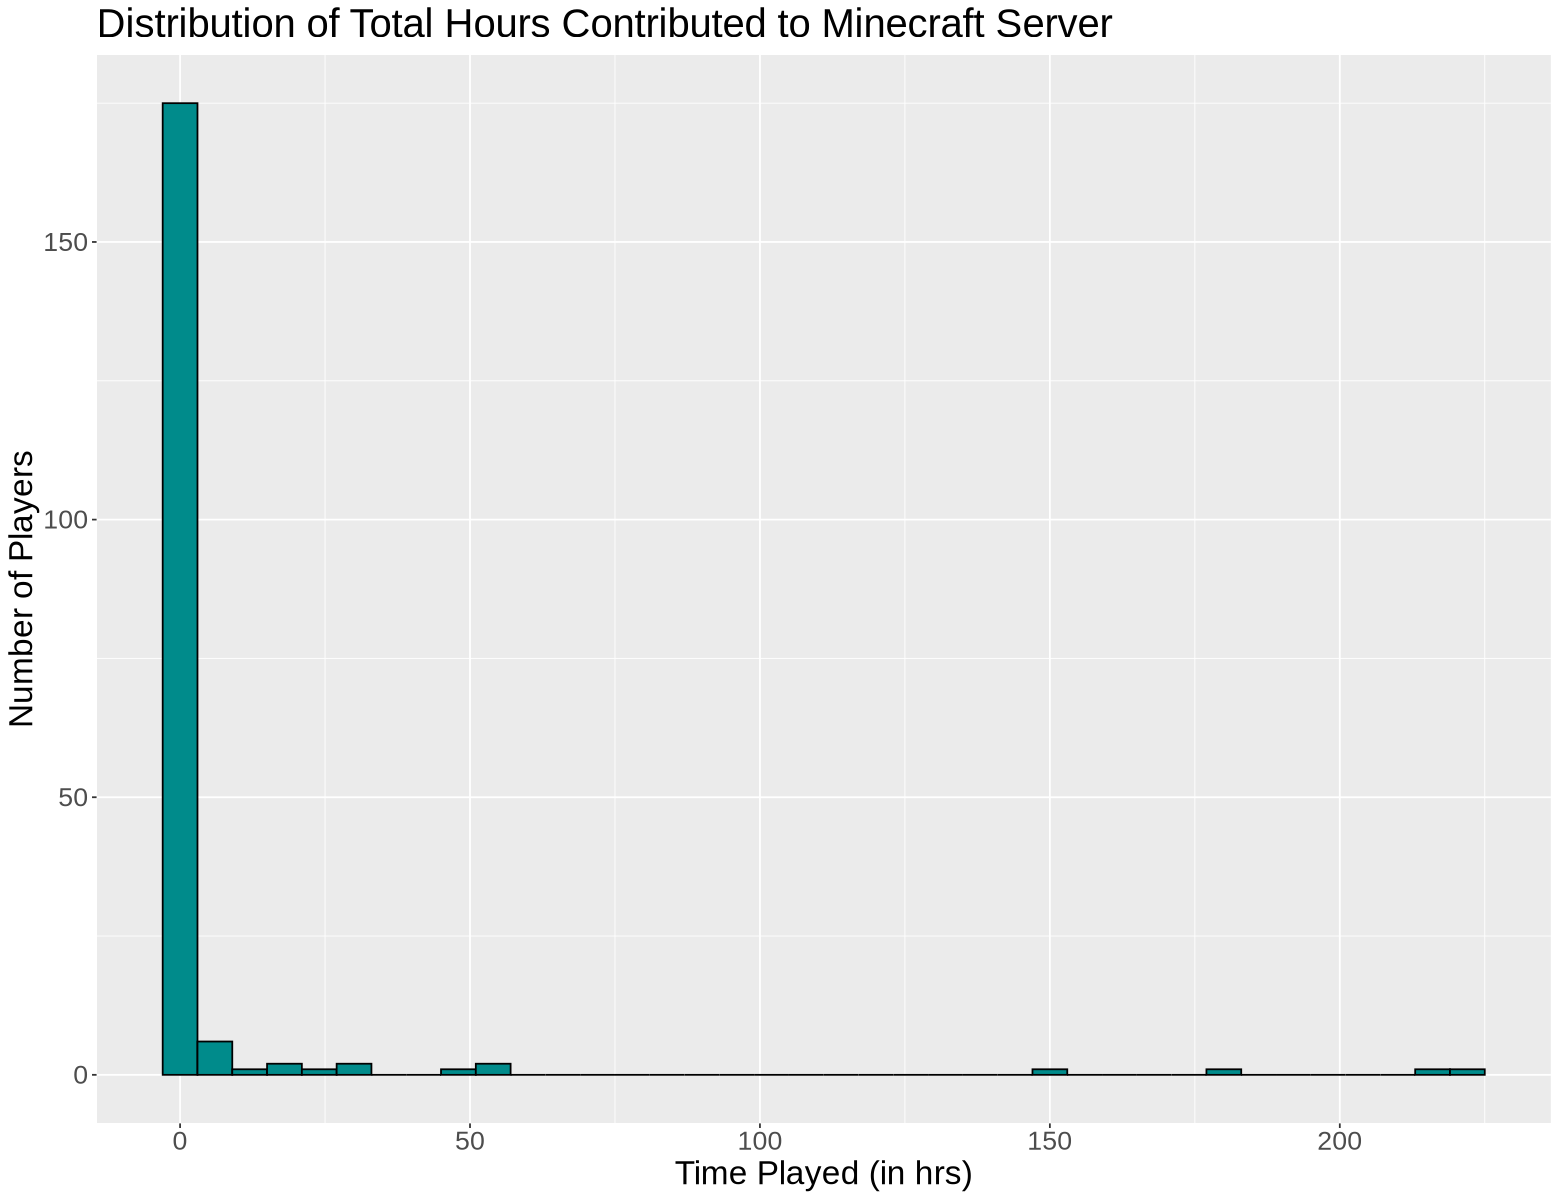

In [4]:
# Final coding cells for part (3) which will present the code required for visualizations!
# Will be split since markdown cells are needed in between each plot!

# Plot 1 visualizing number of players and hours spent playing distribution
options(repr.plot.width = 13, repr.plot.height = 10) 
ggplot(players_wrangled, aes(x = played_hours)) + 
    geom_histogram(binwidth = 6, colour = "black", fill = "darkcyan") +
    labs(x = "Time Played (in hrs)",
         y = "Number of Players",
         title = "Distribution of Total Hours Contributed to Minecraft Server")+
    theme(text = element_text(size = 20))

This plot allows me to see the distribution of player's hours spent on the server and especially showcases the unproportionate amount of 0 hours played which is by far the majority of play time for many players! This lets me know overall how many hours are being contributed by how many people which is useful for my question since I'm trying to find out what age and experience level leads to more hours played!

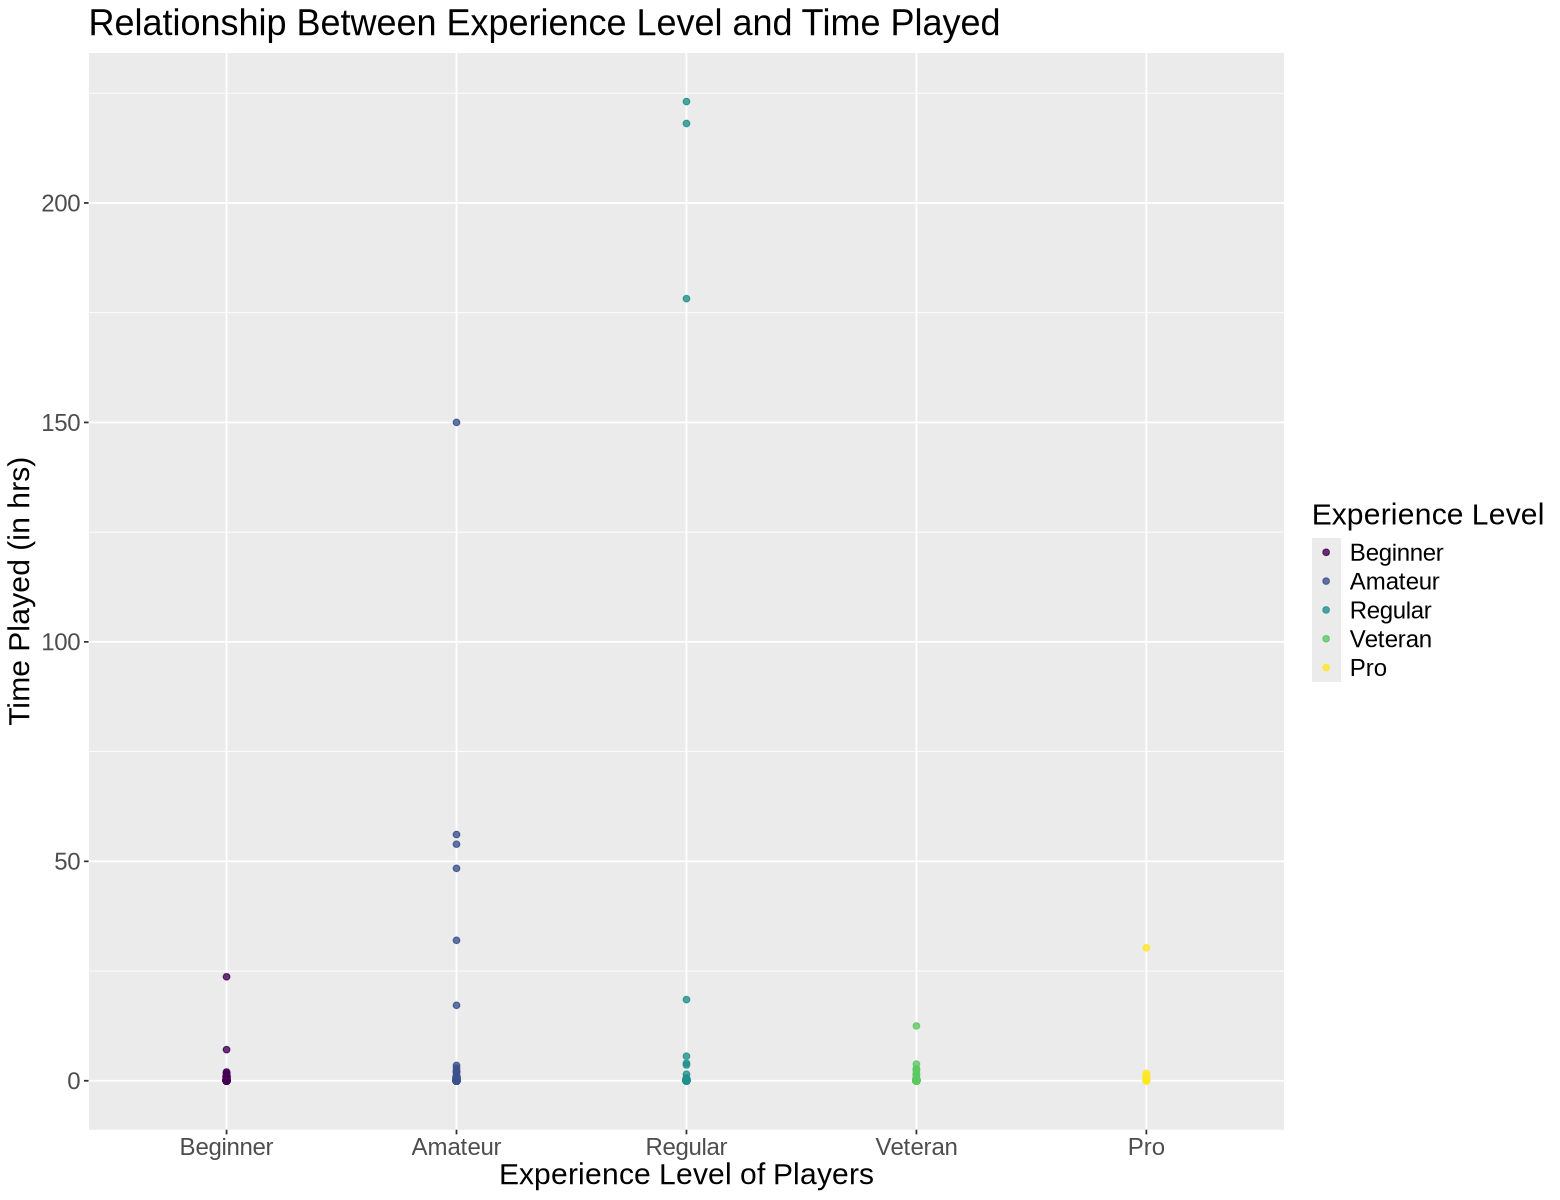

In [5]:
# Plot 2 visualizing experience level with hours spent playing
options(repr.plot.width = 13, repr.plot.height = 10)
ggplot(players_wrangled, aes(x = experience, y = played_hours, colour = experience)) + 
    geom_point(alpha = 0.8) +
    labs(x = "Experience Level of Players",
        y = "Time Played (in hrs)", 
        title = "Relationship Between Experience Level and Time Played",
        colour = "Experience Level") +
  theme(text = element_text(size = 18))

This plot allows me to visualize how experience level affects hours played on the server which is crucial for my specific question since experience is one of my main explanatory variables!

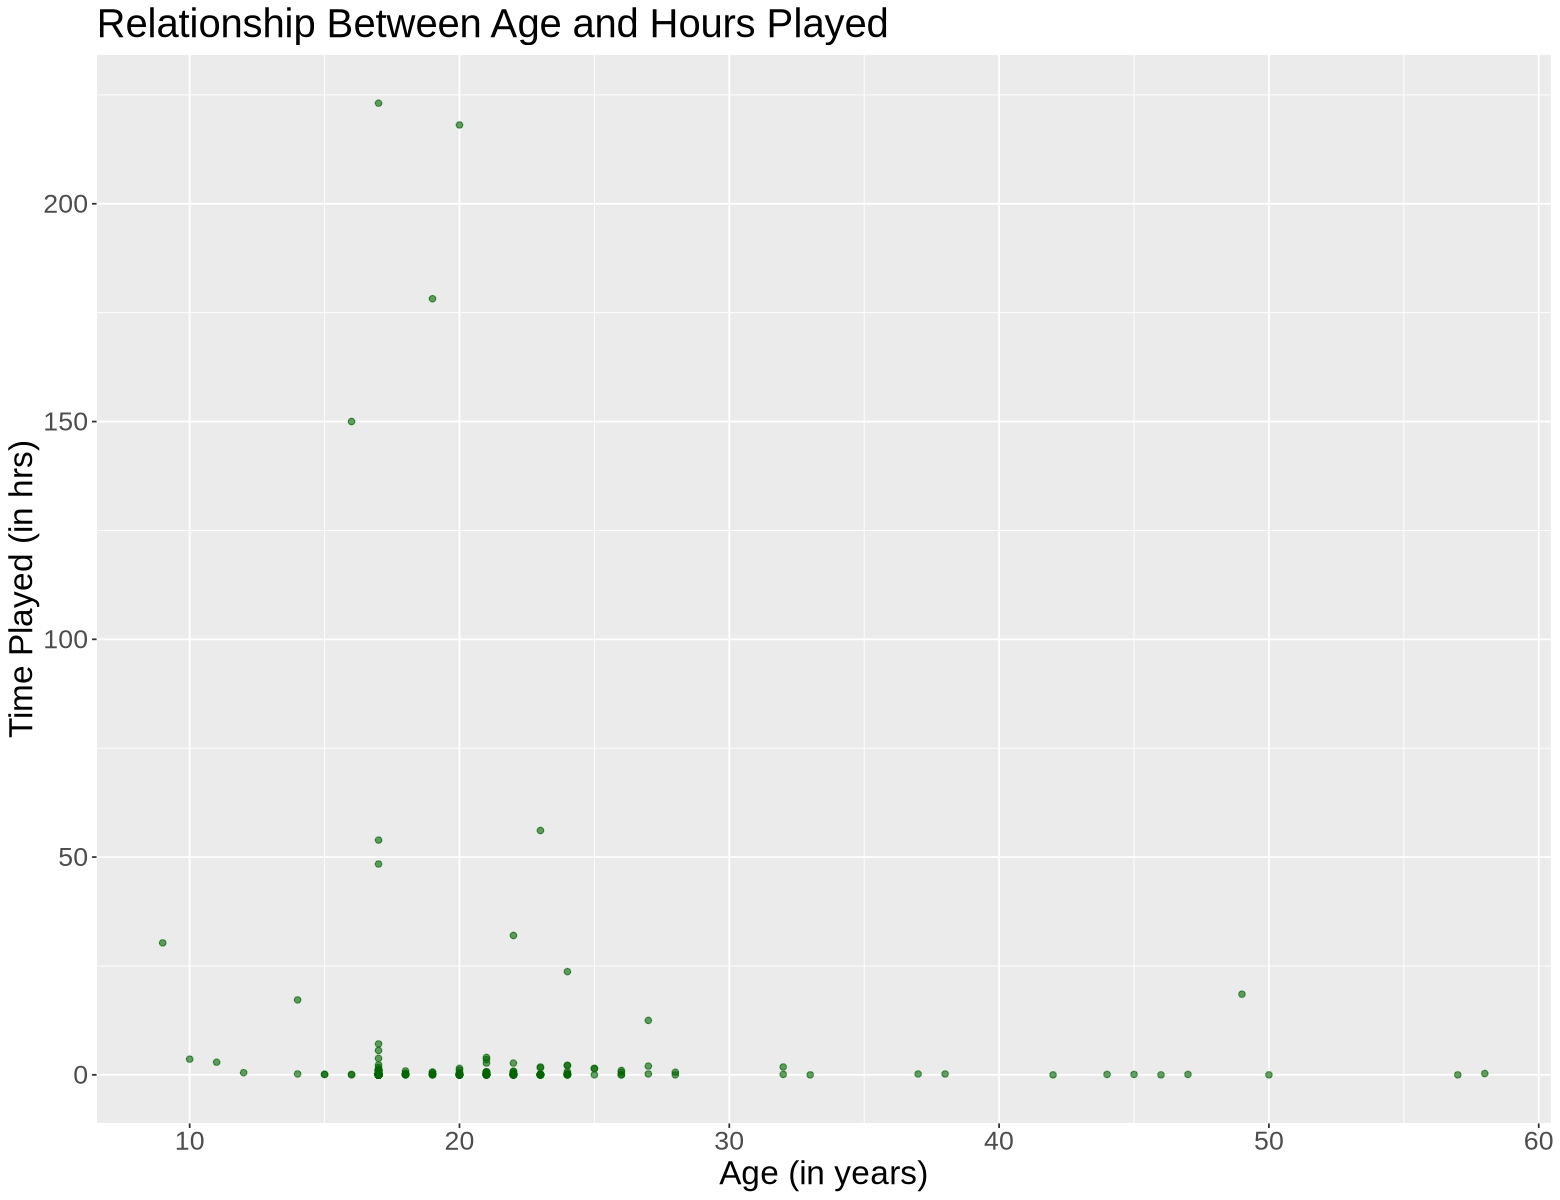

In [6]:
# Plot 3 visualizing age with hours spent playing
options(repr.plot.width = 13, repr.plot.height = 10)
ggplot(players_wrangled, aes(x = Age, y = played_hours)) + 
    geom_point(alpha = 0.6, colour = "darkgreen") +
    labs(x = "Age (in years)",
         y = "Time Played (in hrs)",
         title = "Relationship Between Age and Hours Played") +
    theme(text = element_text(size = 20))

Similarly, this plot allows me to visualize how age affects hours played on the server which is crucial for my specific question since age is also one of my main explanatory variables!

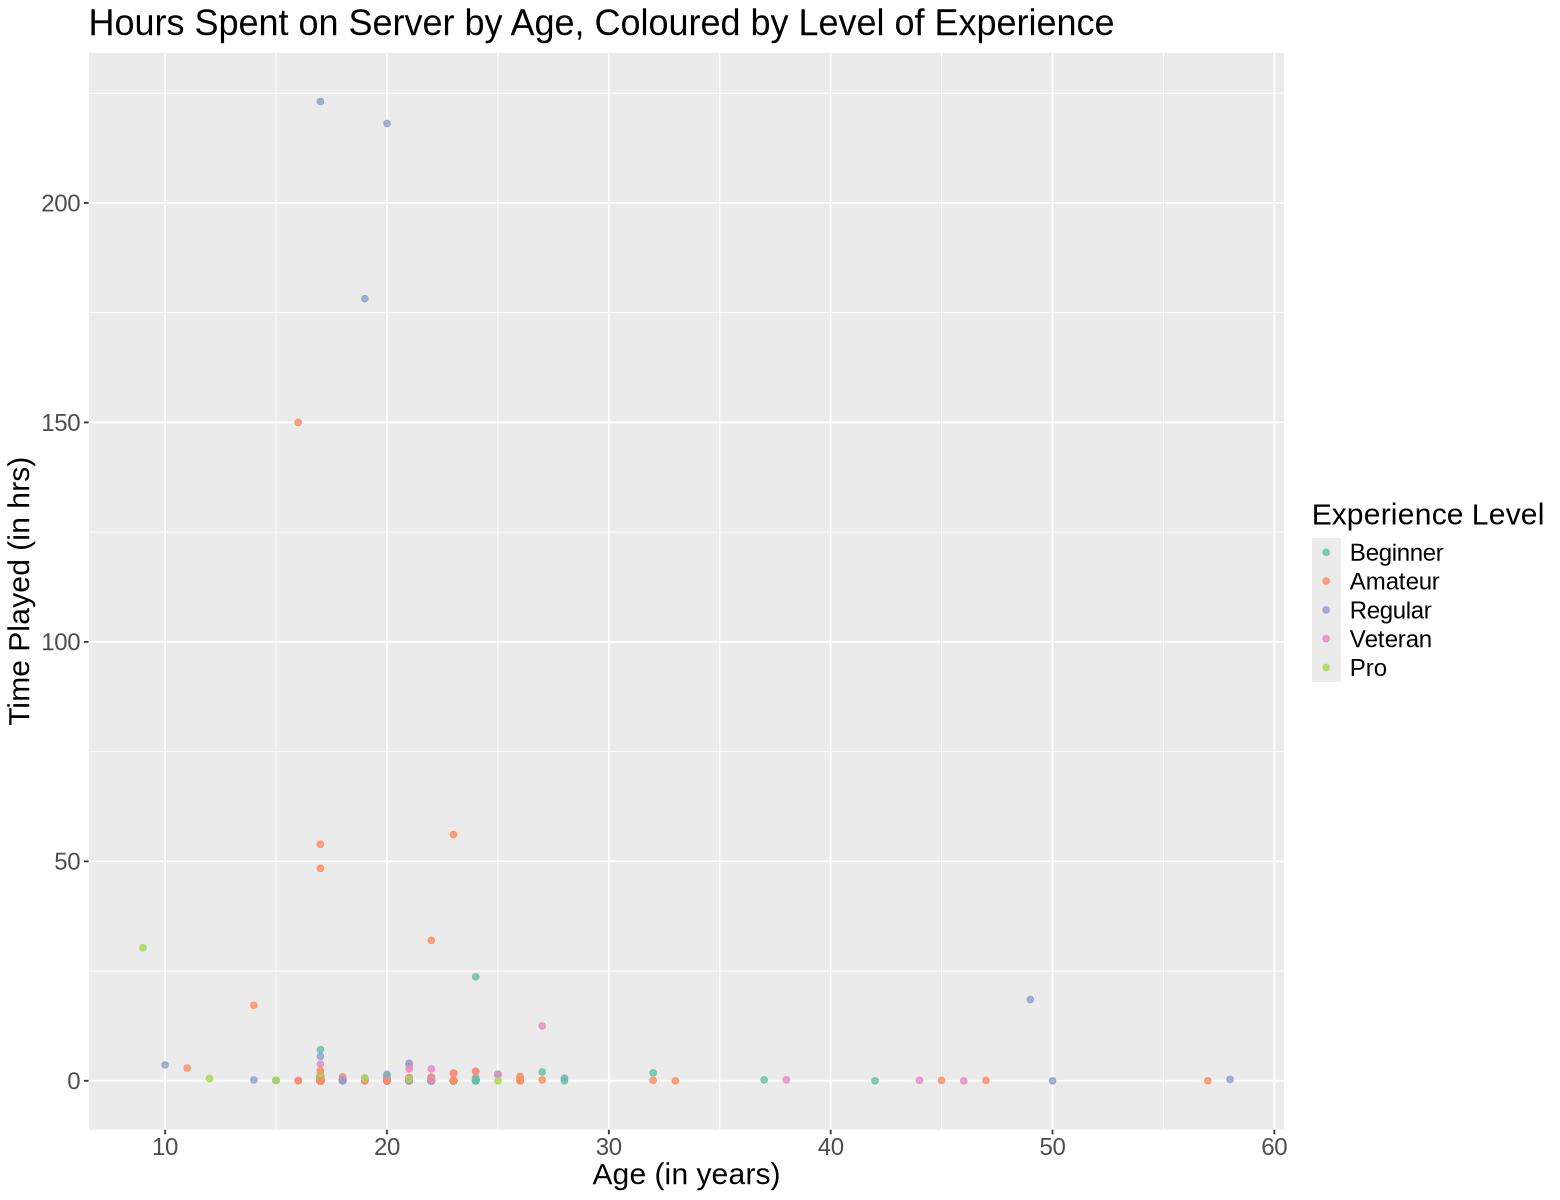

In [7]:
# Plot 4 visualizing age and experience level with hours spent playing
options(repr.plot.width = 13, repr.plot.height = 10)
ggplot(players_wrangled, aes(x = Age, y = played_hours, colour = experience)) + 
    geom_point(alpha = 0.8) +
    labs(x = "Age (in years)",
         y = "Time Played (in hrs)",
         title = "Hours Spent on Server by Age, Coloured by Level of Experience",
         colour = "Experience Level") +
    scale_colour_brewer(palette = "Set2")+
    theme(text = element_text(size = 18))

Lastly, arguably the most useful visual plot, allows me to visualize how age and experience together ultimately affect time spent on the server. This is perfectly intertwined with my specific question since all explanatory and response variables are present!

# (4) Methods and Plan:

Since I am attempting to determine whether age and experience can predict time spent playing on the server, I will be using the multiple linear regression model to discover such relationships. This method is appropriate because the response variable (hours played) is continuous alongside the prescence of multiple predictors. Furthermore, the assumptions for this model assume linearity, observations' independence from one another, somewhat similar variance, and no multicollinearity. This model's weakness lies in its inability to properly predict relationships that are non-linear, sensitivity to outliers, as well as reduced efficiency with nonsensical data points. Since this model does not requrie tuning, we will focus of using RMSE to determine model performance! However, I may use k-fold cross validation (k = 5-10 folds) for a K-NN model to see which model's RMPSE is lower and alter my plan from there. Prior to modeling, I'll initialling split the data 75:25 (training set:test set), experience will be labelled as a categorical factor, imputation will remove missing values, age will remain numerical, no scaling is needed (due to model), and cross-validation will be used on the training set to reduce bias in our estimate.   

# (5) GitHub Repository:

**Link:** https://github.com/zweizer/dsci-100-2025w1-group-9.git